In [14]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
%run /home/doom/github/NginxConfParser/nginxlogparser.py

In [8]:
result = logparser('app006.log')

In [10]:
from pandas import Series, DataFrame

In [11]:
dtindex = ['request_time', 'remote_addr', 'http_referer', 'time_local', 'request', 'bytes_sent', 'status', 'http_user_agent', 'host']
df = DataFrame(result, columns=dtindex)

In [12]:
df['status'] = df['status'].astype('int')

In [16]:
df.index = pd.to_datetime(df.pop('time_local'))

In [27]:
import pylab
pylab.rcParams['figure.figsize'] = 10, 5

In [18]:
df_s = df['status'].resample('5h').count()

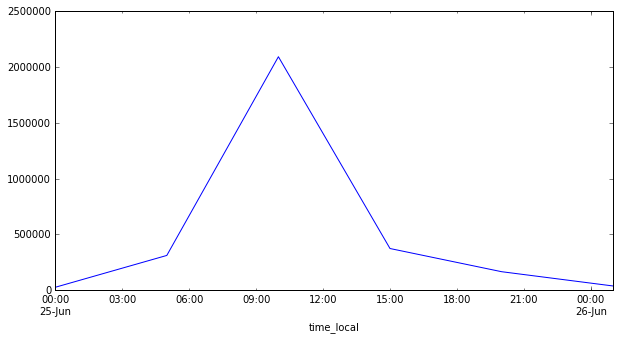

In [19]:
df_s.plot()

In [24]:
ds = df['remote_addr']

In [25]:
sys.getsizeof(ds) /1024 / 1024

224.87453842163086

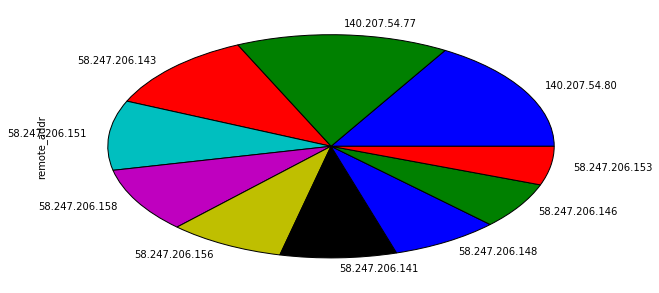

In [28]:
ds.value_counts()[:10].plot.pie()

In [31]:
t_span = '60t'
df_200 = df['status'][df['status'] == 200].resample(t_span).count()
df_502 = df['status'][df['status'] == 502].resample(t_span).count()
df_499 = df['status'][df['status'] == 499].resample(t_span).count()
df_404 = df['status'][df['status'] == 404].resample(t_span).count()
df_302 = df['status'][df['status'] == 302].resample(t_span).count()
df_500 = df['status'][df['status'] == 500].resample(t_span).count()

In [32]:
status_df = DataFrame({'OK': df_200, 
                       'Bad Gateway': df_502, 
                       'Client Closed': df_499, 
                       'Found': df_302, 
                       'Not Found': df_404})

In [33]:
status_df

,Bad Gateway,Client Closed,Found,Not Found,OK
time_local,,,,,
2016-06-25 03:00:00,NaN,2.0,225,227,8053
2016-06-25 04:00:00,NaN,7.0,546,453,17189
2016-06-25 05:00:00,NaN,16.0,953,925,20398
2016-06-25 06:00:00,NaN,53.0,3601,3189,34548
2016-06-25 07:00:00,NaN,83.0,6072,6367,48987
2016-06-25 08:00:00,NaN,154.0,11034,7856,62342
2016-06-25 09:00:00,NaN,153.0,15599,10062,77212
2016-06-25 10:00:00,NaN,11018.0,35548,11856,120132
2016-06-25 11:00:00,32396.0,106404.0,63009,4733,119551
